
# DMT 2023 - Homework 1

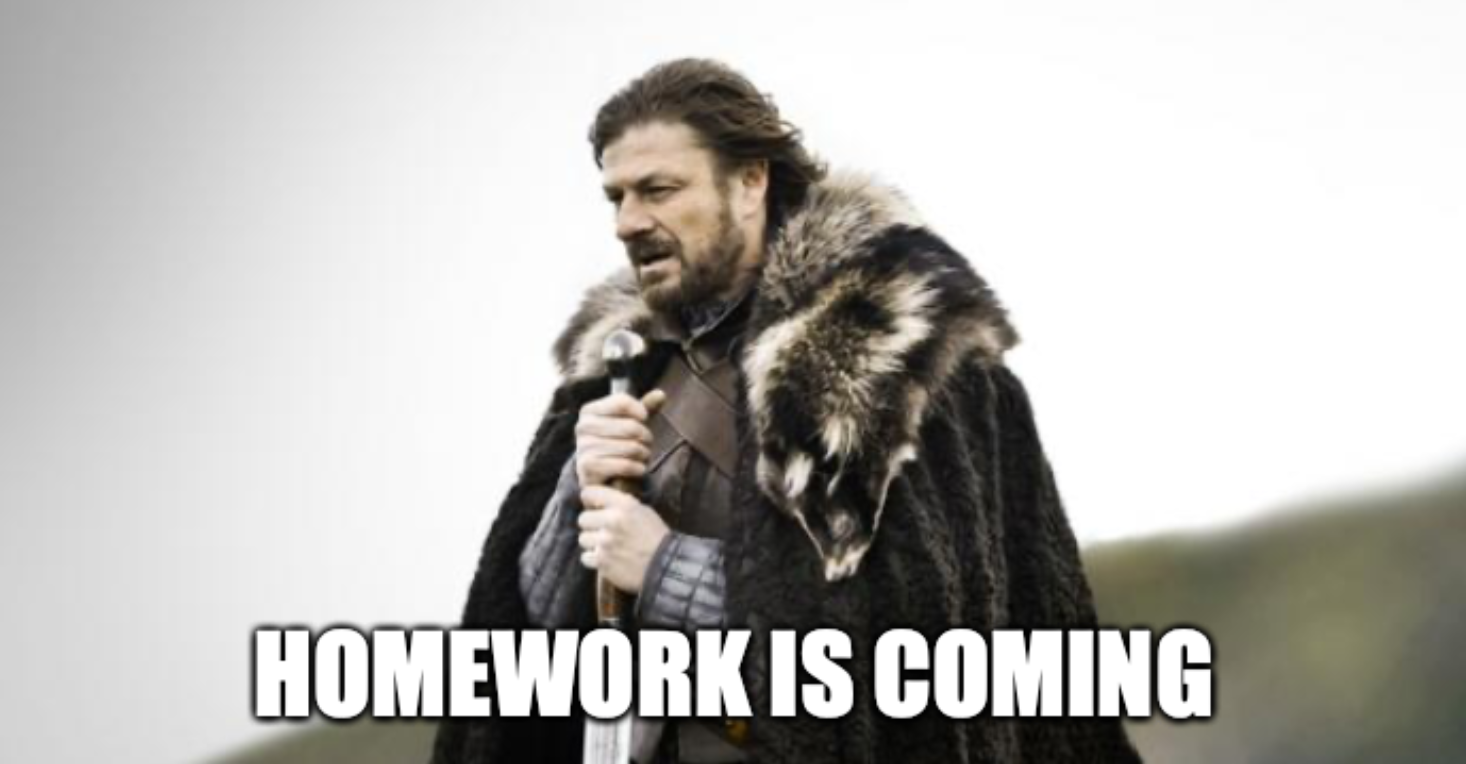


# Instructions for the homework
  > Follow the instructions in the notebook carefully
  


## General instructions
  * Do NOT remove ANYTHING that is already in the notebook.
  * Before you start, show the line number for the code cells:
    * Go to Tools -> Settings -> Editor -> show line numbers
  * Having **EXACTLY TWO** students per group is **MANDATORY**
  * The software must be commented.
  * The notebook will be converted to a PDF, so you must use prints and plots that are displayed in the derived PDF.
  * About this notebook:
    * Create a personal copy to be able to modify it: File > Save a copy in Drive
    * Rename the copied notebook `DMT2023-HW1.ipynb`


## Instructions for **code**:
  * DO NOT add code cells
  * DO NOT remove any code cells
  * Only edit the code cells containing the comment `#YOUR CODE STARTS HERE#`. Within those cells:
    * DO NOT remove ANYTHING that we have written (otherwise specified). In particular, the line `#REMOVE_OUTPUT#` is used in some cells to remove the output of those cells when the notebook is converted to PDF.
    * Add your code between line `#YOUR CODE STARTS HERE#` and line `#YOUR CODE ENDS HERE#`; **DO NOT REMOVE THESE COMMENTS**
    * The last line in each code cell is #THIS IS LINE \<TOT>#, where \<TOT> is a line number. The notebook is constructed so that \<TOT> matches with the line number in which it is written, but it may of course move as you add your code. **Make sure that, when you deliver it, that comment returns to line \<TOT>.** DO NOT CHANGE THE \<TOT> VALUE. Of course, this means that you have a limited number of lines of code that you may NOT exceed under any circumstances. On the other hand, if your code is shorter than that, you have to reach that line number with empty lines.

[comment]: <> (#REMOVE_CELL#)


## Instructions for **text**:
* DO NOT add text cells
* DO NOT remove text cells
* DO NOT modify the text cells we have created.
* Only edit text cells starting with the comment ------------YOUR TEXT STARTS HERE------------. Within those cells:
  * Do NOT remove anything we have entered.
  * **Add your own text after the line ------------YOUR TEXT STARTS HERE------------; DO NOT REMOVE THIS TEXT**
  * For each cell, a specific delivery will be given. If you are given a maximum number of sentences to write, both the dot "." and the semicolon ";" will be considered sentence dividers.

[comment]: <> (#REMOVE_CELL#)

## Group composition:

Write down the list of group members. The format should be Last Name, First Name, Student ID. Group members should be sorted alphabetically by surname and placed on different lines.
Example:

Becchetti, Luca, 123456

Siciliano, Federico, 987654

------------YOUR TEXT STARTS HERE------------

Aur, Marina Iuliana, 1809715

Balestrucci, Sophia, 1713638

<div style="page-break-after: always; visibility: hidden"> 
\pagebreak
</div>

## Homework 1
The homework consists of two parts:

  1. Search-Engine Evaluation

  and

  2. Near-Duplicate-Detection


# Part 1
In this part of the homework, you have to index collections of documents to build search-engines using the PyTerrier library.

Import **ALL** the Python packages that you need for Part 1.

In [283]:
#REMOVE_OUTPUT#
!pip install --upgrade --no-cache-dir gdown
from bs4 import BeautifulSoup
#YOUR CODE STARTS HERE#
!pip install python-terrier
import pyterrier as pt
import pandas as pd
if not pt.started():
  pt.init()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
#YOUR CODE ENDS HERE#
#THIS IS LINE 15#

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Part 1.1
You have to build a search engine for the book *Le Morte D’Arthur* by Thomas Malory and **improve the search-engines performance** (the higher the better). The book is divided into two volumes. Each chapter is a document with two fields: title of the chapter and corpus of the chapter. You only want to index the corpus of each chapter.

### 1.1.1
Download the data from the Drive link (code already provided).

In [284]:
#REMOVE_OUTPUT#
!gdown 1zHgvidy9FvhZvE68S0mXWkoF-hHMpiUL
!gdown 1VjpTkFcbfaLIi4TXVafokW9e_bvGnfut

Downloading...
From: https://drive.google.com/uc?id=1zHgvidy9FvhZvE68S0mXWkoF-hHMpiUL
To: /content/The Project Gutenberg eBook of Le Morte D’Arthur, Volume I (of II), by Thomas Malory.html
100% 964k/964k [00:00<00:00, 587MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VjpTkFcbfaLIi4TXVafokW9e_bvGnfut
To: /content/The Project Gutenberg eBook of Le Morte D’Arthur, Volume II (of II), by Thomas Malory.html
100% 1.10M/1.10M [00:00<00:00, 473MB/s]


### 1.1.2
Parse the HTML. **Part** of code already provided: follow the comments to complete the code.


In [285]:
with open('The Project Gutenberg eBook of Le Morte D’Arthur, Volume I (of II), by Thomas Malory.html') as fp:
    vol1 = BeautifulSoup(fp, 'html.parser')
with open('The Project Gutenberg eBook of Le Morte D’Arthur, Volume II (of II), by Thomas Malory.html') as fp:
    vol2 = BeautifulSoup(fp, 'html.parser')

def clean_text(txt):
    words_to_put_space_before = [".",",",";",":","’","'"]
    words_to_lowercase = ["First","How","Some","Yet","Of","A","The","What","Fifth"]
    
    app = txt.replace("\n"," ")
    for word in words_to_put_space_before:
        app = app.replace(word," "+word)
    for word in words_to_lowercase:
        app = app.replace(word+" ",word.lower()+" ")
    return app.strip()

def parse_html(soup):
    titles = []
    texts = []
    for chapter in soup.find_all("h3"):
        chapter_title = chapter.text
        if "CHAPTER" in chapter_title:
            chapter_title = clean_text("".join(chapter_title.split(".")[1:]))
            titles.append(chapter_title)
            
            chapter_text = [p.text for p in chapter.findNextSiblings("p")]
            chapter_text = clean_text(" ".join(chapter_text))
            texts.append(chapter_text)
    return titles, texts

In [286]:
#YOUR CODE STARTS HERE#
#Extract all the chapters' titles and texts from the two volumes
vol1_titles, vol1_texts = parse_html(vol1)
vol2_titles, vol2_texts = parse_html(vol2)






#Transform the list into a pandas DataFrame (a PyTerrier friendly structure).
d1 = {'title' : vol1_titles, 'text' : vol1_texts, 'vol_nr' : [1 for _ in range(len(vol1_titles))]}
df_vol1 = pd.DataFrame(d1)
d2 = {'title' : vol2_titles, 'text' : vol2_texts, 'vol_nr' : [2 for _ in range(len(vol2_titles))]}
df_vol2 = pd.DataFrame(d2)

df_book = pd.concat([df_vol1, df_vol2], ignore_index = True) 
df_book['docno'] = [str(i) for i in range(len(df_book))]
#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Print the first 8 rows of the DataFrame.

[comment]: <> (#SHOW_CELL#)

In [287]:
#YOUR CODE STARTS HERE#
print("The first 8 rows of DataFrame 'df_book':")
df_book.head(8)





#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

The first 8 rows of DataFrame 'df_book':


,title,text,vol_nr,docno
0,"first , how Uther Pendragon sent for the duke ...","It befell in the days of Uther Pendragon , whe...",1,0
1,how Uther Pendragon made war on the duke of Co...,"Then Ulfius was glad , and rode on more than a...",1,1
2,of the birth of King Arthur and of his nurture,Then Queen Igraine waxed daily greater and gre...,1,2
3,of the death of King Uther Pendragon,Then within two years King Uther fell sick of ...,1,3
4,"how Arthur was chosen king , and of wonders an...",Then stood the realm in great jeopardy long wh...,1,4
5,how King Arthur pulled out the sword divers times,"Now assay , said Sir Ector unto Sir Kay . And ...",1,5
6,"how King Arthur was crowned , and how he made ...",And at the feast of Pentecost all manner of me...,1,6
7,"how King Arthur held in Wales , at a Pentecost...","Then the king removed into Wales , and let cry...",1,7


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 1.1.3
Extract character's names from the **titles** only. **Part** of code already provided: follow the comments to complete the code.

In [288]:
all_characters = set()
def extract_character_names_from_string(string_to_parse):
    special_tokens = ["of","the","le","a","de"]

    remember = ""
    last_is_special_token = False

    tokens = string_to_parse.split(" ")
    characters_found = set()
    for i,word in enumerate(tokens):
        if word[0].isupper() or (remember!="" and word in special_tokens):
            #word = word.replace("'s","").replace("’s","")
            last_is_special_token = False
            if remember!="":
                if word in special_tokens:
                    last_is_special_token = True
                remember = remember+" "+word
            else: remember = word
        else:
            if remember!="":
                if last_is_special_token:
                    for tok in special_tokens:
                        remember = remember.replace(" "+tok,"")
                characters_found.add(remember)
            remember = ""
            last_is_special_token = False
    return characters_found

#all_characters = set([x for x in all_characters if x[-2:]!="'s"])

In [289]:
#YOUR CODE STARTS HERE#
#Extract all characters' names
for title in df_book['title']:
  all_characters.update(extract_character_names_from_string(title))









#YOUR CODE ENDS HERE#
#THIS IS LINE 15#

Print the names of all the kings (i.e. characters with `King` in their name).

[comment]: <> (#SHOW_CELL#)

In [290]:
#YOUR CODE STARTS HERE#
kings = [name for name in all_characters if 'king' in name.lower()]
kings = list(set(kings)) # to remove duplicates
print("The names of all kings in the book: \n")
kings



#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

The names of all kings in the book: 



['King Anguish of Ireland',
 'King of the Land of Cameliard',
 'King Rience',
 'King Ban',
 'King Arthur',
 'King of England',
 'King Howel of Brittany',
 'King Mark',
 'King Pellinore',
 'King Mordrains',
 'King Leodegrance',
 'Maimed King',
 'King Pellam',
 'King Brandegore',
 'King Lot',
 'King Bagdemagus',
 'King Pelles',
 'King Lot of Orkney',
 'King Pelleas',
 'King',
 'King Mark of Cornwall',
 'King Evelake',
 'King Uriens',
 'King Solomon',
 'King Bors']

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 1.1.4
Some names refer to the same characters (e.g. `'Arthur' = 'King Arthur'`). A function is provided to extract the disambiguation dictionary: each key represents a name and the value represents the true character name (e.g. `{'Arthur': 'King-Arthur', 'King': 'King-Arthur', 'Bedivere':'Sir Bedivere'}`). Disambiguation sets, i.e. a list with sets representing the multiple names of a single character, are also provided.

> There may be some mistakes, but it does not matter (e.g. `'Cornwall' = 'King of Cornwall'`)

In [291]:
disambiguate_to = {}
for x in all_characters:
    for y in all_characters:
        if x in y and x!=y:
            if x in disambiguate_to:
                previous_y = disambiguate_to[x]
                if len(y)>len(previous_y): disambiguate_to[x] = y
            else:
                disambiguate_to[x] = y
disambiguate_to.update({"King": "King Arthur",
                        "King of England": "King Arthur",
                        "Queen": "Queen Guenever",
                        "Sir Lancelot": "Sir Launcelot"})

disambiguate_sets = []
for x,y in disambiguate_to.items():
    inserted = False
    for z in disambiguate_sets:
        if x in z or y in z:
            z.add(x); z.add(y)
            inserted = True
    if not inserted:
        disambiguate_sets.append(set([x,y]))

while True:
    to_remove,to_add = [],[]
    for i1,s1 in enumerate(disambiguate_sets[:-1]):
        for s2 in disambiguate_sets[i1+1:]:
            if len(s1.intersection(s2))>0:
                to_remove.append(s1)
                to_remove.append(s2)
                to_add.append(s1.union(s2))
    if len(to_add)>0:
        for rm in to_remove:
            disambiguate_sets.remove(rm)
        for ad in to_add:
            disambiguate_sets.append(ad)
    else: break


### 1.1.5
Prepare the topics for the queries.

> Each character name (including alternative names) represents a topic.

In [292]:
#YOUR CODE STARTS HERE#
sets_of_topics = disambiguate_sets.copy()
for sets in disambiguate_sets:
  for alternative_name in sets:
    if alternative_name in all_characters: 
        all_characters.remove(alternative_name)

for char in all_characters:
  sets_of_topics.append({char})

topics = [', '.join(s) for s in sets_of_topics] # we use the comma to be then able to split the alternative names
dic_of_topics = { 'qid' : [str(i) for i in range(len(topics))], 'query': topics}
df_topics = pd.DataFrame(dic_of_topics)















#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

Print the first 5 rows.

[comment]: <> (#SHOW_CELL#)

In [293]:
#YOUR CODE STARTS HERE#
print("The first 5 rows of DataFrame 'df_topics':")
df_topics.head(5) 





#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

The first 5 rows of DataFrame 'df_topics':


,qid,query
0,0,"Holy Sangreal, Sangreal"
1,1,"Sir Tristram de Liones, Sir Tristram, Tristram"
2,2,"Joyous Gard, Gard"
3,3,"Queen, Queen Guenever, Guenever"
4,4,"Round Table, Knights of the Round Table"


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 1.1.6
Prepare the relevance scores for the queries.

> A document is considered relevant (1) if its **corpus** contains the character's name or one of its alternative names, otherwise is not relevant (0).

In [294]:
#YOUR CODE STARTS HERE#
d = {'qid': [], 'docno' : [], 'label' : []}
label = 0
for row1 in df_topics.iterrows():
  for row2 in df_book.iterrows():
    d['qid'].append(str(row1[1][0]))
    d['docno'].append(str(row2[1][3]))
    for name in row1[1][1].split(','):
       # 'King' and 'Queen' are not valid names to determine relevance in a document because they are not unique
      if name in row2[1][1] and name not in ['King', 'Queen']:
        label = 1                                               
        break                                                   
      else:
        label = 0
    d['label'].append(label)

qrels = pd.DataFrame(d)











#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

Print the first and last row, and the shape of the DataFrame.

[comment]: <> (#SHOW_CELL#)

In [295]:
#YOUR CODE STARTS HERE#
print("The first row of the DataFrame 'qrels':")
display(qrels.head(1))
print(" ")
print("The last row of the DataFrame 'qrels':")
display(qrels.tail(1))
print(" ")
print("The shape of the DataFrame 'qrels' is: ", qrels.shape)
#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

The first row of the DataFrame 'qrels':


,qid,docno,label
0,0,0,0


 
The last row of the DataFrame 'qrels':


,qid,docno,label
85509,169,502,0


 
The shape of the DataFrame 'qrels' is:  (85510, 3)


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 1.1.7
Choose several preprocessing configurations (at least 2, no more than 4).

For each of them, construct an index on the `title` field.

For the last of them, report the number of indexed documents and terms.

In [296]:
#YOUR CODE STARTS HERE#
configurations = ["", 
                  "Stopwords",  
                  "PorterStemmer", 
                  "Stopwords, EnglishSnowballStemmer"] 

def create_index(configuration, field):
  pd_indexer = pt.DFIndexer("./Inverted_Index", overwrite=True)
  pd_indexer.setProperty("termpipelines", configuration)
  indexref = pd_indexer.index(df_book[field], df_book["docno"])
  return indexref

indexref = create_index(configurations[-1], "title")
index = pt.IndexFactory.of(indexref)
print("The number of indexed documents and terms for the configuration 'Stopwords, EnglishSnowballStemmer': \n")
print(index.getCollectionStatistics().toString())


#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

The number of indexed documents and terms for the configuration 'Stopwords, EnglishSnowballStemmer': 

Number of documents: 503
Number of terms: 807
Number of postings: 4209
Number of fields: 0
Number of tokens: 4655
Field names: []
Positions:   false



<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 1.1.8
Choose several weighting models (at least 2, no more than 5).

For each of them, for each of the indices created in last step, build a retrieval model.

In [297]:
#YOUR CODE STARTS HERE#
possible_wmodels = ["CoordinateMatch", 
                    "TF_IDF", 
                    "BM25", 
                    "PL2", 
                    "LemurTF_IDF"] 

def create_retrieval_model(indexref, scoring_function):
  return pt.BatchRetrieve(indexref, wmodel = scoring_function)

list_of_retrieval_models = []
for configuration in configurations:
  indexref = create_index(configuration, "title")
  for wmodel in possible_wmodels:
    retrieval_model = create_retrieval_model(indexref, wmodel)
    list_of_retrieval_models.append(retrieval_model)
    
    
#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

### 1.1.9
Choose several evaluation metrics (at least 3, no more than 6) and put them in a list.

Add the following metrics to the list: Recall at 5, Normalized Discounted Cumulative Gain at 20, Mean Average Precision.

Obviously, the metrics you choose cannot be **completely identical** to these 3 we specified.

In [298]:
#YOUR CODE STARTS HERE#
eval_metrics = ["P_5", 
                "P_10", 
                "Rprec",
                "recall_20",  
                "ndcg_cut_10", 
                "num_rel",
                "recall_5", 
                "ndcg_cut_20", 
                "map"]








#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

### 1.1.10
For each index built in step 1.1.7, run an experiment to obtain the values associated to each evaluation metrics specified in 1.1.8 for each of the weighting models chosen in 1.1.9.

In [299]:
#YOUR CODE STARTS HERE#
result = pt.Experiment(
    list_of_retrieval_models,
    df_topics,
    qrels,
    eval_metrics,
    highlight="bold",
    names = ["CoordinateMatch_without_preprocessing", "TF_IDF_without_preprocessing", "BM25_without_preprocessing", 
             "PL2_without_preprocessing", "LemurTF_IDF_without_preprocessing", "CoordinateMatch_with_stopwords", 
             "TF_IDF_with_stopwords", "BM25_with_stopwords", "PL2_with_stopwords", "LemurTF_IDF_with_stopwords",
             "CoordinateMatch_with_PorterStemmer", "TF_IDF_with_PorterStemmer", "BM25_with_PorterStemmer",
             "PL2_with_PorterStemmer", "LemurTF_IDF_with_PorterStemmer",
             "CoordinateMatch_with_stopwords_and_EnglishSnowballStemmer", "TF_IDF_with_stopwords_and_EnglishSnowballStemmer", 
             "BM25_with_stopwords_and_EnglishSnowballStemmer", "PL2_with_stopwords_and_EnglishSnowballStemmer", 
             "LemurTF_IDF_with_stopwords_and_EnglishSnowballStemmer"]
)












#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

### 1.1.11
For the last index constructed (i.e. corresponding to the last preprocessing chosen), print out the PyTerrier table with the weighting models chosen by you on the rows and the evaluation metrics chosen by you + those specified by us on the columns. 

Highlight the best results in the result table.

In [300]:
#YOUR CODE STARTS HERE#
display(result.data)
best_results = {}
for metric in eval_metrics:
  name = list(result.data['name'][result.data[metric] == result.data[metric].max()]) 
  best_results[metric] = (name, max)
print("\n The best results for each metric: \n") # to fix the PDF display problem with Styler Object
best_results 
#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

,name,P_5,P_10,Rprec,recall_20,ndcg_cut_10,num_rel,recall_5,ndcg_cut_20,map
0,CoordinateMatch_without_preprocessing,0.436471,0.295882,0.285711,0.266166,0.496643,4107.0,0.227657,0.445407,0.291373
1,TF_IDF_without_preprocessing,0.454118,0.311176,0.299906,0.279550,0.509788,4107.0,0.236765,0.461265,0.302762
2,BM25_without_preprocessing,0.442353,0.310000,0.296988,0.278635,0.507098,4107.0,0.233625,0.458322,0.299754
3,PL2_without_preprocessing,0.456471,0.309412,0.298966,0.279213,0.507716,4107.0,0.236915,0.459609,0.300517
4,LemurTF_IDF_without_preprocessing,0.445882,0.310000,0.299685,0.279226,0.507138,4107.0,0.234272,0.458724,0.300959
5,CoordinateMatch_with_stopwords,0.437647,0.293529,0.281658,0.263475,0.494228,4107.0,0.227477,0.443942,0.286416
6,TF_IDF_with_stopwords,0.448235,0.310000,0.295166,0.276049,0.509010,4107.0,0.235381,0.459486,0.297617
7,BM25_with_stopwords,0.444706,0.312353,0.293500,0.278215,0.510223,4107.0,0.232824,0.460399,0.296200
8,PL2_with_stopwords,0.448235,0.308824,0.295279,0.275992,0.507246,4107.0,0.235381,0.458247,0.296103
9,LemurTF_IDF_with_stopwords,0.447059,0.310588,0.295250,0.275950,0.507986,4107.0,0.234975,0.458056,0.296795



 The best results for each metric: 



{'P_5': (['PL2_with_PorterStemmer'], 0.30383095919100905),
 'P_10': (['BM25_with_stopwords_and_EnglishSnowballStemmer'],
  0.30383095919100905),
 'Rprec': (['LemurTF_IDF_with_PorterStemmer'], 0.30383095919100905),
 'recall_20': (['LemurTF_IDF_with_PorterStemmer'], 0.30383095919100905),
 'ndcg_cut_10': (['BM25_with_stopwords_and_EnglishSnowballStemmer'],
  0.30383095919100905),
 'num_rel': (['CoordinateMatch_with_PorterStemmer',
   'TF_IDF_with_PorterStemmer',
   'BM25_with_PorterStemmer',
   'PL2_with_PorterStemmer',
   'LemurTF_IDF_with_PorterStemmer',
   'CoordinateMatch_with_stopwords_and_EnglishSnowballStemmer',
   'TF_IDF_with_stopwords_and_EnglishSnowballStemmer',
   'BM25_with_stopwords_and_EnglishSnowballStemmer',
   'PL2_with_stopwords_and_EnglishSnowballStemmer',
   'LemurTF_IDF_with_stopwords_and_EnglishSnowballStemmer'],
  0.30383095919100905),
 'recall_5': (['PL2_without_preprocessing'], 0.30383095919100905),
 'ndcg_cut_20': (['BM25_with_stopwords_and_EnglishSnowballStemme

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 1.1.12
Select the Top-4 configurations (preprocessing, weighting model) according to the Mean Average Precision (MAP), taking into account the results obtained in section 1.1.10.

For these 4 configurations, provide the following plot (re-run the evaluations just for this configurations, to get the required evaluation metrics):

* Recall@k plot
    * the x axis represents the considered values for k: you must consider k 𝜖 {1, 3, 5, 10, 20, 50}
    * the y axis represents the average Recall@k over all provided queries
    * each curve represents one of the 4 search engine configurations

Pyterrier table:


,name,recall_1,recall_3,recall_5,recall_10,recall_20,recall_50
0,TF_IDF_with_PorterStemmer,0.145819,0.215707,0.236626,0.260927,0.281469,0.309223
1,TF_IDF_without_preprocessing,0.145819,0.215915,0.236765,0.260505,0.279550,0.307510
2,LemurTF_IDF_with_PorterStemmer,0.144005,0.214460,0.234517,0.260963,0.282122,0.309457
3,PL2_with_PorterStemmer,0.143858,0.215707,0.236775,0.260709,0.281316,0.309640


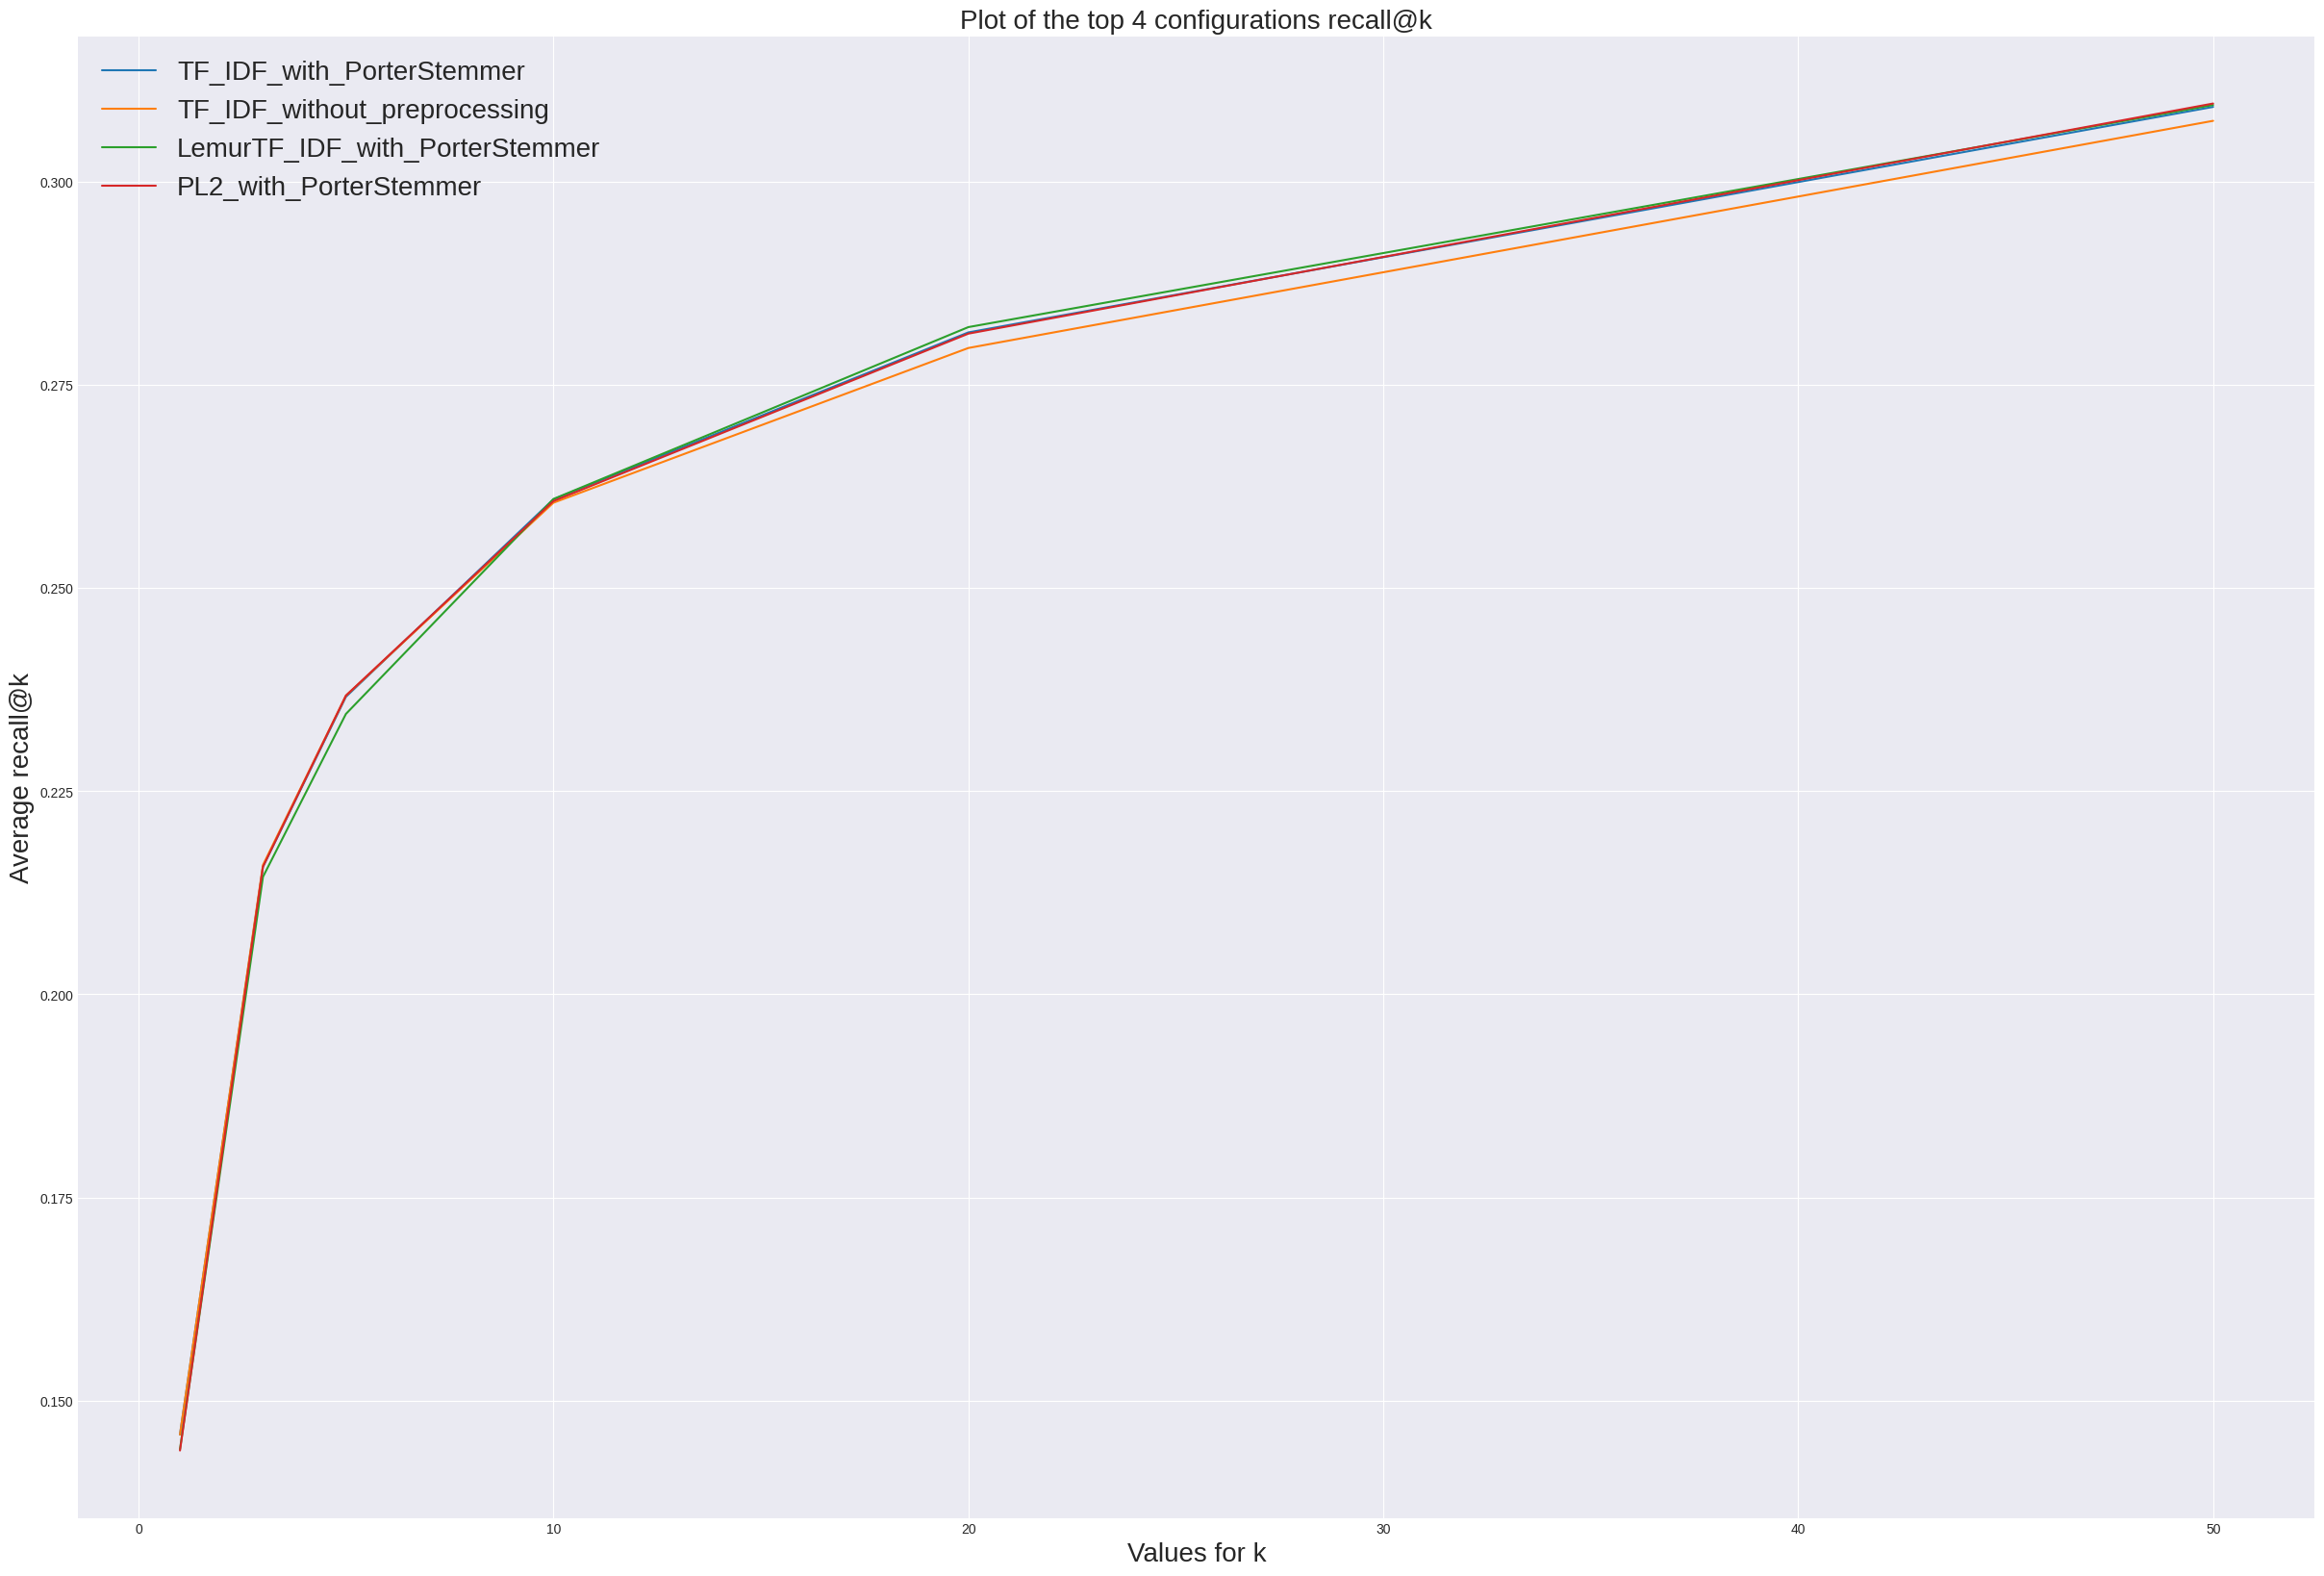

In [301]:
#YOUR CODE STARTS HERE#
index_top_4 = result.data.nlargest(4, ['map']).index
top_4_configurations = [list_of_retrieval_models[i] for i in index_top_4]
new_eval_metrics = ["recall_1", "recall_3", "recall_5", "recall_10", "recall_20", "recall_50"]

result2 = pt.Experiment(
    top_4_configurations,
    df_topics,
    qrels,
    new_eval_metrics,
    highlight="bold",
    names = result.data['name'].loc[index_top_4]
)

print("Pyterrier table:")
display(result2.data)
print(" ")

plt.style.use("seaborn-darkgrid")
fig,ax = plt.subplots(figsize=(30, 20))
for i in range(4):
  d = {1 : result2.data["recall_1"][i], 3: result2.data["recall_3"][i],
      5 : result2.data["recall_5"][i], 10 : result2.data["recall_10"][i],
      20: result2.data["recall_20"][i], 50 : result2.data["recall_50"][i]}

  ax.plot(d.keys(), d.values(), )
  ax.set_xlabel('Values for k', fontsize = 20)
  ax.set_ylabel('Average recall@k', fontsize = 20)
  ax.legend(result.data['name'].loc[index_top_4], prop={'size': 20})

plt.title("Plot of the top 4 configurations recall@k", fontsize = 20)
plt.show()
















#YOUR CODE ENDS HERE#
#THIS IS LINE 50#

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 1.1.13
According only to the Recall@k plot, which is the best search engine configuration? Explain your answer in **at most 3 sentences**.

------------YOUR TEXT STARTS HERE------------

All the four configurations show similar results in the plot, so they all turn out to be good options for the search engine configuration in our dataset. 

In general, **green and red curve** (respectively *LemurTF_IDF_with_PorterStemmer* and *PL2_with_PorterStemmer*) seem to us to be more robust when we are dealing with more data and the plot turns out that **no pre-processing leads to worse results increasing k**.

Between the two configurations, we decide to choose the one where we use **PorterStemmer** for the pre-processing and the **PL2** retrieval model, but we argue that LemurTF_IDF and TF_IDF models are probably also a valid choice.




<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 1.1.14
For the configuration you selected in Part 1.1.13, provide an **example of the functioning** of your search enginge.

The query should be `King Mark of Cornwall`.

In [302]:
#YOUR CODE STARTS HERE#
query = "King Mark of Cornwall"
search_engine = pt.BatchRetrieve(create_index("PorterStemmer", "title"), wmodel="PL2").search(query)
print("Search engine results:")
display(search_engine)

print("\n")
print("Print of the top 3 search engine results in the Dataframe df_book: \n")
top_3_docid = list(search_engine['docid'])[:3]
for docid in top_3_docid:
  print(df_book.loc[docid], "\n")







#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Search engine results:


,qid,docid,docno,rank,score,query
0,1,231,231,0,6.673539,King Mark of Cornwall
1,1,215,215,1,6.622714,King Mark of Cornwall
2,1,259,259,2,6.295796,King Mark of Cornwall
3,1,33,33,3,5.819559,King Mark of Cornwall
4,1,252,252,4,4.942725,King Mark of Cornwall
...,...,...,...,...,...,...
328,1,360,360,328,0.640278,King Mark of Cornwall
329,1,137,137,329,0.637367,King Mark of Cornwall
330,1,417,417,330,0.637367,King Mark of Cornwall
331,1,135,135,331,0.627802,King Mark of Cornwall




Print of the top 3 search engine results in the Dataframe df_book: 

title     how King Mark was sorry for the good renown of...
text      Now will we speak , and leave Sir Tristram , S...
vol_nr                                                    1
docno                                                   231
Name: 231, dtype: object 

title     how King Mark , by the advice of his council ,...
text      Then the queen departed , but the brachet woul...
vol_nr                                                    1
docno                                                   215
Name: 215, dtype: object 

title     how King Arthur made King Mark to be accorded ...
text      Now pass we our matter , and leave we Sir Gawa...
vol_nr                                                    2
docno                                                   259
Name: 259, dtype: object 



<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

## Part 1.2

You will be given a scenario and some requirements to fulfill. By respecting the requirements, you will have to choose the proper **configuration**, represented in terms of:
1. A suitable preprocessing (if any)
2. A suitable weighting model (if any)
3. A suitable evaluation metric (if any)

You must then provide an explanation of your choice in **at most 3 sentences**.

N.B. There is not necessarily only one correct answer.

### 1.2.1
**Scenario:** The company ExcaliburDMT needs a search engine for the book *Le Morte D’Arthur* by Thomas Malory. The book is divided into two volumes.

> They want to consider each chapter as a document with two fields: title of the chapter and corpus of the chapter. For now, they only want to index the title of each chapter.

> They only want their users to be able to query character namesᴬ and match them exactly (also, order is importantᴮ).

> They would like to show 10 results on the screen in a random order, in a sword-like shape.

> The company wants to evaluate the performance of the search engine: each chapter's title containing a character's name is considered relevant for a query containing that character's name.

ᴬ Character names are extracted from the collection of documents. See Part 1.1.3.

ᴮ Order is important: if the query is "King Arthur", "Arthur, King of Britain" should have less scoring than "King Arthur of Camelot".



What is the configuration (as defined in part 1.2) that would best meet the needs of the ExcaliburDMT company? **Use at most 3 sentences (1 per section).**

------------YOUR TEXT STARTS HERE------------

Preprocessing: Clean Text + Tokenization 



Weighting model: PL2 + 1 extra point in the score if there's a phrase match



Evaluation metric: Recall_10



Provide an explanation of your choice in **at most 3 sentences**.

------------YOUR TEXT STARTS HERE------------

To respond to this new need, we can clean and pre-process query and the document titles as a list of **ordered tokens** using Tokenization.

Once pre-processed, we can use **PL2** as retrieval model with the addition of **1 extra point** to the final score if there is a **phrase match** between the query and a part of the document: that means, if the character is indicated in the title of the document with the same order of the query will be *pushed up* in the score table.

Finally, we can evaluate our search engine with **Recall_10** displaying this top 10 results in a random order.


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

# Part 2

In this part of the homework, you have to find, in an approximated way, all near-duplicate documents inside a collection of documents.

These constraints **must** be satisfied while carrying out this part of the homework:

  * We will consider Near-duplicates all those pair of documents that have a Jaccard similarity greater than or equal to 0.93
  * Each set of shingles, that represents an original document, must be sketched in a Min-Hashing sketch with a length of at most 332
  * The probability to have as a near-duplicate candidate a pair of documents with Jaccard=0.93 must be > 0.96
  * The generation process of near-duplicate pairs you implement must generate the smallest amount of both **False-Negatives** and **False-Positives**
  * The running time of all the LSH process (LSH + approximate Jaccard) must be less than 2 minutes.

Import **ALL** the Python packages that you need for Part 2.

In [303]:
#REMOVE_OUTPUT#
#YOUR CODE STARTS HERE#
import csv
import random
import itertools as it
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt




#YOUR CODE ENDS HERE#
#THIS IS LINE 15#


#### NDD functions
A range of functions to perform the Near-Duplicates pipeline is provided by us. You must use them, but **you may not modify or overwrite** them under any circumstances. If you have any doubts about how they work, have a look at them to get an idea of what they do.


##### Shingling

> The `cleaner` function will remove from a string all the characters that are not in a predefined set of characters of interest. Multiple spaces will be removed automatically. The function will also remove spaces at the start and end of the sentence, and change all the letters to lowercase.

In [304]:
set__characters_of_interest = set(
    [' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
     'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'])
def cleaner(text, set__characters_of_interest):
    new_text = ""
    #
    previous_copied_character = "a"
    for c_character in text:
        #
        c_character = c_character.lower()
        #
        if c_character not in set__characters_of_interest:
            c_character = " "
        #
        if c_character == " " and c_character == previous_copied_character:
            continue
        #
        new_text += c_character
        #
        previous_copied_character = c_character
        #
    #
    new_text = new_text.strip()
    #
    return new_text

> The `get_shingle_id` function will transform a shingle (a tuple of strings) into its shingle id. The `map__shingle__shingle_id` dictionary will handle the mapping.

In [305]:
def get_shingle_id(shingle):
    global max_shingle_id
    global map__shingle__shingle_id
    #
    shingle_id = map__shingle__shingle_id.get(shingle, -1)
    #
    if shingle_id >= 0:
        return shingle_id
    
    max_shingle_id += 1
    shingle_id = max_shingle_id
    map__shingle__shingle_id[shingle] = max_shingle_id
    #
    return shingle_id

> The `shingler` function takes as input a string and (optionally) a shingle width. It splits the string into words, then iterates in groups of the given length, transforming each into its own shingle_id, and finally outputs the set of shingles that constitutes the sentence.

In [306]:
def shingler(text, width=2):
    #
    set__shingle_id = set()
    #
    tokenized_text = text.split(" ")
    #
    max_index_plus_1 = 1 if len(tokenized_text) <= width else len(tokenized_text) - width +1
    for index in range(max_index_plus_1):
        #
        c_shingle = tuple(tokenized_text[index:index + width])
        #
        shingle_id = get_shingle_id(c_shingle)
        #
        # if shingle_id in set__shingle_id:
        #    print(shingle_id, c_shingle)
        #
        res = set__shingle_id.add(shingle_id)
        #
    return set__shingle_id

> This function will load each sentence inside the input file. The rows of the input file must have two attributes: document_id and document_text. For each record, the text will be processed by the `cleaner` function, turned into shingles by the `shingler` function, and the result will be written in the output file.

In [307]:
def create_sets_of_shingle_ids(input_file_name, output_file_name,
                               input_file_delimiter='\t', input_file_quotechar='"',
                               set__characters_of_interest=[" "], shingle_width=3,
                               doc_id_column_idx=0, field_column_idx=1):
    #
    output_file = open(output_file_name, 'w', encoding="utf-8")
    output_file_csv_writer = csv.writer(output_file, delimiter='\t', quotechar='"', quoting=csv.QUOTE_NONE)
    header = ['set_id', 'set_of_integers']
    output_file_csv_writer.writerow(header)
    #
    input_file = open(input_file_name, 'r', encoding="utf-8")
    input_file_csv_reader = csv.reader(input_file, delimiter=input_file_delimiter, quotechar=input_file_quotechar)
    next(input_file_csv_reader)
    for record in input_file_csv_reader:
        #
        doc_id = int(record[doc_id_column_idx])
        document = record[field_column_idx]
        #
        cleaned_document = cleaner(document, set__characters_of_interest)
        #
        set__shingle_id = shingler(cleaned_document, width=shingle_width)
        #
        output_file_csv_writer.writerow([doc_id, set__shingle_id])
        #
        #
        if doc_id % 1000 == 0:
            print("Last processed doc_id:", doc_id)
        #
    input_file.close()
    output_file.close()
    print("Last processed doc_id:", doc_id)
    print()
    print("max_shingle_id=", max_shingle_id)
    print()
    print()
    return max_shingle_id


##### MinWise Hashing

> This simple function will (smartly) check if a number is prime.

In [308]:
def is_prime(number):
    #
    if number == 2:
        return True
    if (number % 2) == 0:
        return False
    for j in range(3, int(number ** 0.5 + 1), 2):
        if (number % j) == 0:
            return False
    #
    return True

> The `create_hash_functions` function will take as input the number of hash function desired and the upper bound on the number of distinct elements. It will generate the three values `(a, b, p)` that defines an hash function `number_of_hash_functions` times and return all this information into a dictionary. The optional seed argument will be used to set the random seed, so that the hash function obtained can be controlled.

In [309]:
def create_hash_functions(number_of_hash_functions, upper_bound_on_number_of_distinct_elements, seed=42):
    random.seed(seed)
    #
    map__hash_function_id__a_b_p = {}
    #
    set_of_all_hash_functions = set()
    while len(set_of_all_hash_functions) < number_of_hash_functions:
        a = random.randint(1, upper_bound_on_number_of_distinct_elements - 1)
        b = random.randint(0, upper_bound_on_number_of_distinct_elements - 1)
        p = random.randint(upper_bound_on_number_of_distinct_elements, 10 * upper_bound_on_number_of_distinct_elements)
        while is_prime(p) == False:
            p = random.randint(upper_bound_on_number_of_distinct_elements,
                               10 * upper_bound_on_number_of_distinct_elements)
        #
        c_hash_function = (a, b, p)
        set_of_all_hash_functions.add(c_hash_function)
    #
    for c_hash_function_id, c_hash_function in enumerate(set_of_all_hash_functions):
        map__hash_function_id__a_b_p[c_hash_function_id] = c_hash_function
    #
    return map__hash_function_id__a_b_p

> The `create_c_set_MinWiseHashing_sketch` function will receive as input a set of shingles, a list of hash functions parameters and the total number of hash functions to use. For each hash function, it applies it to each shingle and keeps the minimum value. It gives as output the MinWiseHashing sketch as a list.

In [310]:
def create_c_set_MinWiseHashing_sketch(c_set,
                                       map_as_list__index__a_b_p,
                                       total_number_of_hash_functions, use_numpy_version = True):
    if use_numpy_version:
      app = np.array(map_as_list__index__a_b_p)
      c_set_MinWiseHashing_sketch = list(np.min((app[:,:1]*np.array(list(c_set))[None,:]+app[:,1:2])%app[:,2:],axis=1))
    else:
      plus_inf = float("+inf")
      c_set_MinWiseHashing_sketch = [plus_inf] * total_number_of_hash_functions
      for c_element_id in c_set:
          for index, (a, b, p) in enumerate(map_as_list__index__a_b_p):
              c_hash_value = (a * c_element_id + b) % p
              if c_hash_value < c_set_MinWiseHashing_sketch[index]:
                  c_set_MinWiseHashing_sketch[index] = c_hash_value
              #
          #   
      #
    return c_set_MinWiseHashing_sketch

> The `create_MinWiseHashing_sketches` function first generates the list of hash functions. Then it iterates through the input file containing the set of shingles for each document, computing the MinWiseHashing sketch for each set of shingles and storing this information into a dictionary. This variable is then saved into an output file.

In [311]:
def create_MinWiseHashing_sketches(input_file_name, upper_bound_on_number_of_distinct_elements,
                                   number_of_hash_functions_that_is_also_the_sketch_lenght_and_also_the_number_of_simulated_permutations,
                                   output_file_name, use_numpy_version=True):
    #
    map__hash_function_id__a_b_p = create_hash_functions(
        number_of_hash_functions_that_is_also_the_sketch_lenght_and_also_the_number_of_simulated_permutations,
        upper_bound_on_number_of_distinct_elements)
    #
    map__set_id__MinWiseHashing_sketch = {}
    #
    total_number_of_hash_functions = len(map__hash_function_id__a_b_p)
    # sorted_list_all_hash_function_id = sorted(map__hash_function_id__a_b_p.keys())
    map_as_list__index__a_b_p = tuple([(a, b, p) for a, b, p in map__hash_function_id__a_b_p.values()])
    #
    input_file = open(input_file_name, 'r', encoding="utf-8")
    input_file_csv_reader = csv.reader(input_file, delimiter='\t', quotechar='"', quoting=csv.QUOTE_NONE)
    header = next(input_file_csv_reader)
    num_record_so_far = 0
    for record in input_file_csv_reader:
      num_record_so_far += 1
      if num_record_so_far % 100 == 0:
          print(num_record_so_far)
      c_set_id = int(record[0])
      c_set = eval(record[1])

      c_set_MinWiseHashing_sketch = create_c_set_MinWiseHashing_sketch(c_set,map_as_list__index__a_b_p,
                                                                       total_number_of_hash_functions,
                                                                       use_numpy_version)
      
      #print(len(c_set_MinWiseHashing_sketch))
      map__set_id__MinWiseHashing_sketch[c_set_id] = c_set_MinWiseHashing_sketch
    input_file.close()
    #
    output_file = open(output_file_name, 'w', encoding="utf-8")
    output_file_csv_writer = csv.writer(output_file, delimiter='\t', quotechar='"', quoting=csv.QUOTE_NONE)
    header = ['set_id', 'MinWiseHashing_sketch']
    output_file_csv_writer.writerow(header)
    sorted_list_all_set_id = sorted(map__set_id__MinWiseHashing_sketch.keys())
    for c_set_id in sorted_list_all_set_id:
        output_file_csv_writer.writerow([c_set_id, str(map__set_id__MinWiseHashing_sketch[c_set_id])])
    output_file.close()
    #
    return


##### Locality-Sensitive Hashing

> This function will simply load the MinWiseHashing sketches from the given input file.

In [312]:
def load_map__set_id__MinWiseHashing_sketch_from_file(input_file_name):
    map__set_id__MinWiseHashing_sketch = {}
    #
    input_file = open(input_file_name, 'r', encoding="utf-8")
    input_file_csv_reader = csv.reader(input_file, delimiter='\t', quotechar='"', quoting=csv.QUOTE_NONE)
    header = next(input_file_csv_reader)
    for record in input_file_csv_reader:
        c_set_id = int(record[0])
        c_MinhiseHashing_sketch = tuple(eval(record[1]))
        #
        map__set_id__MinWiseHashing_sketch[c_set_id] = c_MinhiseHashing_sketch
        #
    input_file.close()
    #
    return map__set_id__MinWiseHashing_sketch

> The function computes the sets of unordered couples of document identifiers for which there is at least one band in common between the MinWiseHashing sketches. It takes in input the number or rows and the number of bands and the MinWiseHashing sketches. The number of rows (r) multiplied by the number of bands (b) must be equal to the size of the sketches (n): r*b = n.

In [313]:
def get_set_of_CANDIDATES_to_be_near_duplicates(r, b, map__set_id__MinWiseHashing_sketch):
    #
    set_of_CANDIDATES_to_be_near_duplicates = set()
    #
    for c_band_progressive_id in range(b):
        #
        print("c_band_progressive_id", c_band_progressive_id)
        #
        c_band_starting_index = c_band_progressive_id * r
        c_band_ending_index = (c_band_progressive_id + 1) * r
        #
        map__band__set_set_id = {}
        #
        for c_set_id in map__set_id__MinWiseHashing_sketch:
            #
            if r * b != len(map__set_id__MinWiseHashing_sketch[c_set_id]):
                n = len(map__set_id__MinWiseHashing_sketch[c_set_id])
                message = "ERROR!!! n != r*b " + str(n) + "!=" + str(r * b) + "; " + str(n) + "!=" + str(r) + "*" + str(
                    b)
                raise ValueError(message)
            #
            c_band_for_c_set = tuple(
                map__set_id__MinWiseHashing_sketch[c_set_id][c_band_starting_index:c_band_ending_index])
            #
            if c_band_for_c_set not in map__band__set_set_id:
                map__band__set_set_id[c_band_for_c_set] = set()
            map__band__set_set_id[c_band_for_c_set].add(c_set_id)
            #

        for c_set_set_id in map__band__set_set_id.values():
            #
            if len(c_set_set_id) > 1:
                #
                for set_id_a, set_id_A in it.combinations(c_set_set_id, 2):
                    if set_id_a < set_id_A:
                        set_of_CANDIDATES_to_be_near_duplicates.add((set_id_a, set_id_A))
                    else:
                        set_of_CANDIDATES_to_be_near_duplicates.add((set_id_A, set_id_a))
        #
    #
    return set_of_CANDIDATES_to_be_near_duplicates

> Given two MinWiseHashing sketches, this function will iterate through each of them, counting how many items are equal. Then, it will output this count divided by the length of the sketches.

In [314]:
def compute_approximate_jaccard(set_a_MinWiseHashing_sketch, set_b_MinWiseHashing_sketch):
    appx_jaccard = 0.
    #
    for index in range(len(set_a_MinWiseHashing_sketch)):
        #
        if set_a_MinWiseHashing_sketch[index] == set_b_MinWiseHashing_sketch[index]:
            appx_jaccard += 1
        #
    appx_jaccard /= len(set_a_MinWiseHashing_sketch)
    #
    return appx_jaccard

> Given a Jaccard Threshold, this function will iterate through the list of near duplicates CANDIDATES, computing for each of them the approximate jaccard. If this value overcomes the threshold, the candidate pair is added to a dictionary to be returned.

In [315]:
def compute_approximate_jaccard_to_REDUCE_the_number_of_CANDIDATES_to_be_near_duplicates(
        set_of_CANDIDATES_to_be_near_duplicates,
        map__set_id__MinWiseHashing_sketch, jaccard_threshold):
    map__set_a_id__set_A_id__appx_jaccard = {}
    #
    for set_a_id, set_A_id in set_of_CANDIDATES_to_be_near_duplicates:
        #
        set_a_MinWiseHashing_sketch = map__set_id__MinWiseHashing_sketch[set_a_id]
        set_A_MinWiseHashing_sketch = map__set_id__MinWiseHashing_sketch[set_A_id]
        #
        appx_jaccard = compute_approximate_jaccard(set_a_MinWiseHashing_sketch, set_A_MinWiseHashing_sketch)
        #
        if appx_jaccard >= jaccard_threshold:
            map__set_a_id__set_A_id__appx_jaccard[(set_a_id, set_A_id)] = appx_jaccard
        #
    #
    return map__set_a_id__set_A_id__appx_jaccard

> This function simply calls all the four previous functions in order; loads the MinWiseHashing sketches, gets the CANDIDATES to be near-duplicates and computes the approximate Jaccard to REDUCE the number of CANDIDATES.

In [316]:
def mine_couples_of_Near_Duplicates(input_file_name, r, b, jaccard_threshold):
    #
    print("Starting the loading of the MinWiseHashing sketches from the input file.")
    map__set_id__MinWiseHashing_sketch = load_map__set_id__MinWiseHashing_sketch_from_file(input_file_name)
    print()
    print("Number of sets=", len(map__set_id__MinWiseHashing_sketch))
    print()
    #
    print("Starting the mining of the CANDIDATES couples to be near duplicates.")
    set_of_CANDIDATES_to_be_near_duplicates = get_set_of_CANDIDATES_to_be_near_duplicates(r, b,
                                                                                          map__set_id__MinWiseHashing_sketch)
    #
    print()
    print("Number of pairs of sets to be near-duplicate CANDIDATES=", len(set_of_CANDIDATES_to_be_near_duplicates))
    print()
    #
    map__set_a_id__set_A_id__appx_jaccard = compute_approximate_jaccard_to_REDUCE_the_number_of_CANDIDATES_to_be_near_duplicates(
        set_of_CANDIDATES_to_be_near_duplicates, map__set_id__MinWiseHashing_sketch, jaccard_threshold)
    print()
    print("Number of REFINED pairs of sets to be near-duplicate CANDIDATES=",
          len(map__set_a_id__set_A_id__appx_jaccard))
    print()
    #
    output_file = open(output_file_name, 'w', encoding="utf-8")
    output_file_csv_writer = csv.writer(output_file, delimiter='\t', quotechar='"', quoting=csv.QUOTE_NONE)
    header = ['set_a_id', 'set_b_id', 'approximate_jaccard']
    output_file_csv_writer.writerow(header)
    sorted_list_all_set_id = sorted(map__set_id__MinWiseHashing_sketch.keys())
    for set_a_id__set_A_id in map__set_a_id__set_A_id__appx_jaccard:
        appx_jaccard = map__set_a_id__set_A_id__appx_jaccard[set_a_id__set_A_id]
        output_file_csv_writer.writerow([set_a_id__set_A_id[0], set_a_id__set_A_id[1], appx_jaccard])
    output_file.close()
    return

## Part 2.1

### 2.1.1
Download the dataset from the Drive link (code already provided). 

In [317]:
#REMOVE_OUTPUT#
!gdown 16LQDmla82XFK1B0lr8H9ycm01pxjURXN

Downloading...
From (uriginal): https://drive.google.com/uc?id=16LQDmla82XFK1B0lr8H9ycm01pxjURXN
From (redirected): https://drive.google.com/uc?id=16LQDmla82XFK1B0lr8H9ycm01pxjURXN&confirm=t&uuid=de8bf013-c5bd-45b0-a2e9-12004e3e58d9
To: /content/150K_lyrics_from_MetroLyrics.csv
100% 186M/186M [00:00<00:00, 230MB/s]


### 2.1.2
Inspect the dataset: print the list of fields names. Print the value of the `song` field for the last 3 documents.

In [318]:
#YOUR CODE STARTS HERE#
df_songs = pd.read_csv('150K_lyrics_from_MetroLyrics.csv')
print("The list of flieds names in the dataset: \n", list(df_songs.columns))
print("\n")
print("The value of the song field for the last 3 documents:")
df_songs.tail(3)












#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

The list of flieds names in the dataset: 
 ['ID', 'song', 'year', 'artist', 'genre', 'lyrics']


The value of the song field for the last 3 documents:


,ID,song,year,artist,genre,lyrics
149997,209048,oh-what-a-fool-i-have-been,2007,gary-glitter,rock,oh what a fool i've been you changed this begg...
149998,209049,lonely-boy,2007,gary-glitter,rock,i'm just a lonely boy lonely and blue i'm all ...
149999,209050,sidewalk-sinner,2007,gary-glitter,rock,a long the grooviest street in town you're tre...


### 2.1.3
Turn the lyrics field of each document into a sets of shingles of length 4 and save the result to a file named `hw1_set_id_set_of_integers.tsv`

In [319]:
#REMOVE_OUTPUT#
#YOUR CODE STARTS HERE#
set__characters_of_interest = set(
    [' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
     'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'])
max_shingle_id = -1
map__shingle__shingle_id = {}
input_file_name = "150K_lyrics_from_MetroLyrics.csv"
input_file_delimiter = ','
input_file_quotechar = '"'
output_file_name = "hw1_set_id_set_of_integers.tsv"
shingle_width = 4
doc_id_column_idx = 0
field_column_idx = 5
max_shingle_id = create_sets_of_shingle_ids(input_file_name, output_file_name, input_file_delimiter,
                                            input_file_quotechar, set__characters_of_interest, shingle_width,
                                            doc_id_column_idx, field_column_idx)

#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Last processed doc_id: 0
Last processed doc_id: 1000
Last processed doc_id: 2000
Last processed doc_id: 4000
Last processed doc_id: 5000
Last processed doc_id: 7000
Last processed doc_id: 9000
Last processed doc_id: 13000
Last processed doc_id: 14000
Last processed doc_id: 16000
Last processed doc_id: 17000
Last processed doc_id: 18000
Last processed doc_id: 19000
Last processed doc_id: 22000
Last processed doc_id: 25000
Last processed doc_id: 26000
Last processed doc_id: 27000
Last processed doc_id: 29000
Last processed doc_id: 31000
Last processed doc_id: 33000
Last processed doc_id: 34000
Last processed doc_id: 36000
Last processed doc_id: 37000
Last processed doc_id: 38000
Last processed doc_id: 40000
Last processed doc_id: 42000
Last processed doc_id: 43000
Last processed doc_id: 44000
Last processed doc_id: 46000
Last processed doc_id: 47000
Last processed doc_id: 48000
Last processed doc_id: 49000
Last processed doc_id: 50000
Last processed doc_id: 52000
Last processed doc_id: 5

### 2.1.4
Load the file containing the sets of shingles and apply MinWiseHashing, saving the result into a file named `hw1_set_id_MinWiseHashing_sketch.tsv`. Choose the number of hash functions (n) in relation to the constraints highlighted at the beginning of part 2. Provide an explanation for your choice in **exactly one sentence**.

------------YOUR TEXT STARTS HERE------------

We choose **200** as the number of hash functions n because it seem to us to be a **good compromise** between a fast system (too many hash functions would have slowed down the next phase of LSH) and one that can lead to accurate results.

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

In [320]:
#REMOVE_OUTPUT#
#YOUR CODE STARTS HERE#
input_file_name = "hw1_set_id_set_of_integers.tsv"
output_file_name = "hw1_set_id_MinWiseHashing_sketch.tsv"

number_of_hash_functions_that_is_also_the_sketch_length_and_also_the_number_of_simulated_permutations = 200

create_MinWiseHashing_sketches(input_file_name, max_shingle_id,
                               number_of_hash_functions_that_is_also_the_sketch_length_and_also_the_number_of_simulated_permutations,
                               output_file_name)








#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

### 2.1.5
To perform Locality Sensivity Hashing, you have to choose the number of rows (r) and the number bands (b). List all the possible choices of r and b that satisfy the constraints highlighted at the beginning of part 2, according to the number of hash functions you chose.

For all of these configurations, plot all the associated S-curves. The S-curve is defined as the probability (y-axis) that a pair of documents with Jaccard similarity j (x-axis) is selected as a near-duplicate candidate given r and b. Plot all S-curves in the same plot.

Text(0.5, 1.0, 'Probability of LSH finding a candidate pair')

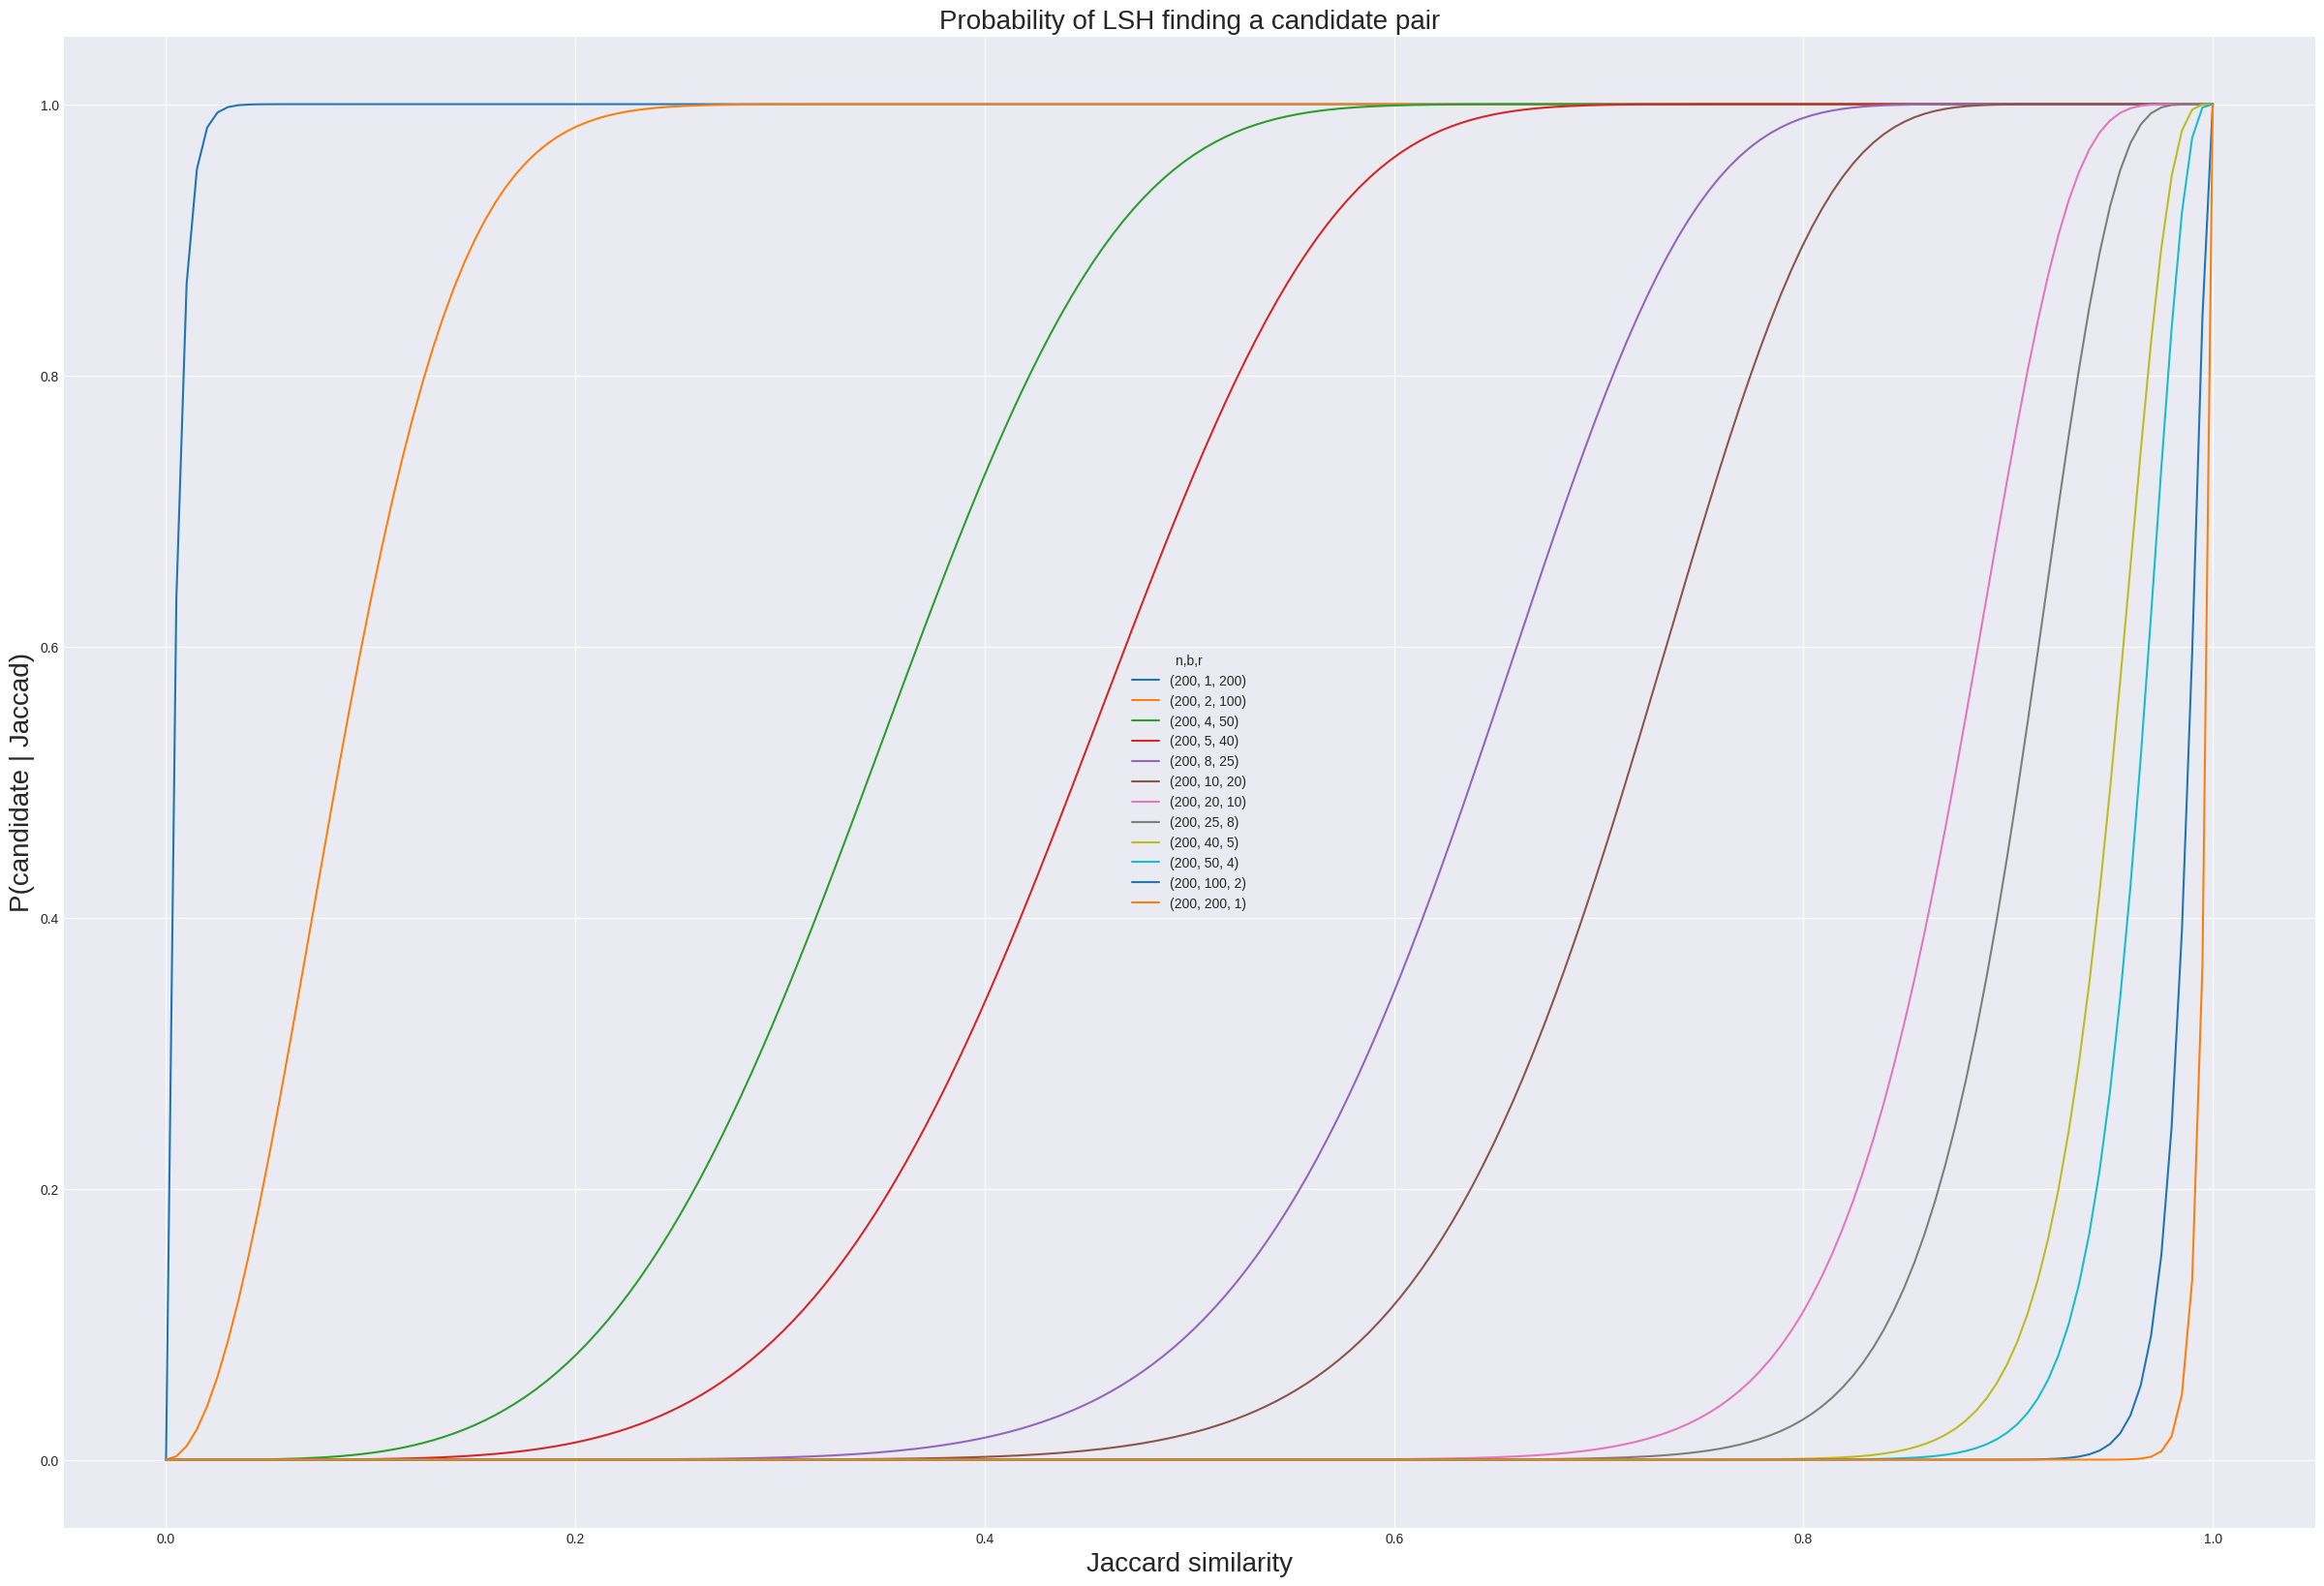

In [321]:
#YOUR CODE STARTS HERE#
df = pd.DataFrame(data =[(1, 200), (2, 100), (4, 50), (5, 40), (8, 25), (10, 20), (20, 10), (25,8), (40, 5), (50, 4), (100, 2), (200, 1)], columns=['b', 'r'])
df['n'] = df['b'] * df['r']
for j in np.linspace(0, 1, 200):
    df[j] = 1 - (1 - j**df['b']) ** df['r']

df = pd.pivot_table(df, index=['n', 'b', 'r'])

ax = df.T.plot(figsize=(30, 20))
plt.ylabel('P(candidate | Jaccad)', fontsize = 20)
plt.xlabel('Jaccard similarity', fontsize = 20)
plt.title('Probability of LSH finding a candidate pair', fontsize = 20)
















#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

### 2.1.6
Among all the configurations you plotted in the previous step, choose the one that gives the smallest amount of False-Positives and False-Negatives near-duplicates candidates, satisfying the provided constraints. You **must** take into account, that after the LSH procedure, the approximate Jaccard similarity between near-duplicate candidates is computed and used to reduce their number.

Provide an explanation for your choice in **at most 3 sentences**.

In [322]:
#YOUR CODE STARTS HERE#
r = 20
b = 10
#YOUR CODE ENDS HERE#
#THIS IS LINE 5#

------------YOUR TEXT STARTS HERE------------

The *rightmost S-curves* in the plot are those with **high b** so also a higher number of False-Positives candidates (lower similarity threshold), while the *leftmost S-curves* are those with **lower b** so also a higher number of False-Negatives candidates (higher similarity threshold). 

A number of bands *b equal to 10* and a number of rows *r equal to 20* (the brown S-curve in the plot) turned out to be the solution that fit better our dataset because, being in an **intermediate configuration**, we generate the smallest amount of both False-Negatives and False-Positives (which will then be removed with the approximate Jaccard Similarity) .


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 2.1.7
Load the file containing the MinWiseHashing sketches and perform Locality Sensivity Hashing, using the parameters you chose in last step, considering also the computation of approximate Jaccard to reduce the number of candidates. Save the Near-Duplicates candidates obtained to a file named `hw1_NearDuplicates_set_a_id_set_b_id_approximate_jaccard.tsv`.

Print the execution time.

In [323]:
#YOUR CODE STARTS HERE#
jaccard_threshold = 0.93
input_file_name = "hw1_set_id_MinWiseHashing_sketch.tsv"
output_file_name = "hw1_NearDuplicates_set_a_id_set_b_id_approximate_jaccard.tsv"
start_time = time.time()
mine_couples_of_Near_Duplicates(input_file_name, r, b, jaccard_threshold)
end_time = time.time()
print("The execution time is:", end_time-start_time, "seconds.")




















#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

Starting the loading of the MinWiseHashing sketches from the input file.

Number of sets= 150000

Starting the mining of the CANDIDATES couples to be near duplicates.
c_band_progressive_id 0
c_band_progressive_id 1
c_band_progressive_id 2
c_band_progressive_id 3
c_band_progressive_id 4
c_band_progressive_id 5
c_band_progressive_id 6
c_band_progressive_id 7
c_band_progressive_id 8
c_band_progressive_id 9

Number of pairs of sets to be near-duplicate CANDIDATES= 18831


Number of REFINED pairs of sets to be near-duplicate CANDIDATES= 17177

The execution time is: 65.42058444023132 seconds.


### 2.1.8
Load the file containing the number of near-duplicates candidates. Print the number of near-duplicates candidates you found.

In [324]:
#YOUR CODE STARTS HERE#
output_file = pd.read_csv("hw1_NearDuplicates_set_a_id_set_b_id_approximate_jaccard.tsv", delimiter = "\t")
print("At the end of the LSH, we found", output_file.shape[0], "near-duplicates candidates.\n")
print("First 10 candidate pairs in the file:\n\n", output_file.loc[:10])
























#YOUR CODE ENDS HERE#
#THIS IS LINE 30#

At the end of the LSH, we found 17177 near-duplicates candidates.

First 10 candidate pairs in the file:

     set_a_id  set_b_id  approximate_jaccard
0      84406    142635                  1.0
1      93123     93130                  1.0
2      66462     98489                  1.0
3     118894    118976                  1.0
4      55585    129461                  1.0
5     183011    183054                  1.0
6     118924    119084                  1.0
7     118957    119032                  1.0
8     118943    119097                  1.0
9     127105    127205                  1.0
10      4543    129016                  1.0


<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

## Part 2.2
You will be given a scenario and you will have to provide the best solution.

### 2.2.1

Let us consider the same scenario as in Part 2.1, with the only addition of not wanting more than 100 False Negatives. How would the choice of the LSH configuration change? Would you need any more information to satisfy the new constraint?

------------YOUR TEXT STARTS HERE------------

We may compute the number of False-Negatives as the *probability that two documents D1 and D2 are not similar in all b bands* and it is reasonable to assume that **this probability is very low if b is high enough**.

`P(D1 and D2 are not similar in all b bands) = (1 - (Jaccard)^r)^b` 

The LSH configurations that respect the constraint that False-Negatives candidates are less than 100 are those where **b is greater than or equal to 20** (the rightmost S-curves) because increasing the bands also increases the probability of finding the most similar candidate pairs.

In this way, the number of False-Positives and that of False-Negatives is no longer balanced: we would also need a maximum number of False-Positives to choose a reasonable and not too high b.

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>


# Submission instructions

Follow the instructions precisely
1. Run the whole notebook up to this point
  * Click on this text cell and go to Runtime > Run before
  * It is essential that the notebook can be run from start to finish without us having to change anything.
2. Download the current notebook
  * File -> Download -> Download .ipynb
3. Upload the downloaded notebook in the current runtime
  * In the left sidebar menu, open the last tab (Files)
  * Click on the first button under the File title (Page with arrow pointing up)
  * In the new window, upload the notebook just downloaded



4. To turn the notebook into a pdf you need to install a Tex extension. Simply run the next cell of code:

In [277]:
#REMOVE_CELL#
!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-fonts-recommended is already the newest version (2019.20200218-1).
texlive-plain-generic is already the newest version (2019.202000218-1).
texlive-xetex is already the newest version (2019.20200218-1).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


5. Now, run the next cell to set some cell tags in the notebook file.

In [278]:
#REMOVE_CELL#
import nbformat as nbf
from glob import glob
notebooks = glob("/content/**/*.ipynb", recursive=True)

text_search_dict = ["YOUR TEXT STARTS HERE","#YOUR CODE STARTS HERE#"]

for ipath in notebooks:
    print(ipath)
    ntbk = nbf.read(ipath, nbf.NO_CONVERT)

    for cell in ntbk.cells:
        cell_type = cell['cell_type'] == "code"
      
        cell_tags = cell.get('metadata', {}).get('tags', [])
        cell_tags = set(cell_tags)

        if cell_type == 0: #markdown
          if (cell['source'][0]!="#" and text_search_dict[cell_type] not in cell['source'] and "pagebreak" not in cell['source']) or "#REMOVE_CELL#" in cell['source']:
            cell_tags.add("remove_cell")

        else: #code
          #if text_search_dict[cell_type] not in cell['source'] or "#REMOVE_CELL#" in cell['source']:
          if "#REMOVE_CELL#" in cell['source']:
            cell_tags.add("remove_cell")
          elif "#REMOVE_OUTPUT#" in cell['source']:
            cell_tags.add("remove_output")
        
        if len(cell_tags) > 0:
            cell['metadata']['tags'] = list(cell_tags)

    nbf.write(ntbk, ipath)

/content/DMT2023_HW1.ipynb


6. Now, run the next cell to transform the notebook to PDF without the code cells.
  * The file will appear in the menu on the left (refresh if needed). The file should be named `DMT2023-HW1.pdf`
  * Rename this file **Surname1_Surname2_DMT2023HW1_report.pdf** (e.g. Becchetti_Siciliano_DMT2023HW1_report.pdf). Sort the surnames alphabetically.
  * Click on it and using the right button or the three dots at its side, click on download to transfer it to your local PC
  

In [279]:
#REMOVE_CELL#
!jupyter nbconvert /content/DMT2023_HW1.ipynb --to pdf --TagRemovePreprocessor.remove_cell_tags='{"remove_cell"}' -TagRemovePreprocessor.remove_all_outputs_tags='{"remove_output"}'

[NbConvertApp] Converting notebook /content/DMT2023_HW1.ipynb to pdf
[NbConvertApp] Support files will be in DMT2023_HW1_files/
[NbConvertApp] Making directory ./DMT2023_HW1_files
[NbConvertApp] Making directory ./DMT2023_HW1_files
[NbConvertApp] Writing 149326 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 671194 bytes to /content/DMT2023_HW1.pdf


7. Now, rename the downloaded notebook **Surname1_Surname2_DMT2023_HW1_notebook.ipynb** (e.g. Becchetti_Siciliano_DMT2023_HW1_notebook.ipynb). Sort the surnames alphabetically.

8. Now that you have both files, you need to upload them to Classroom. Only the student with the surname that comes first in alphabetical order **must** upload the files. Only the files uploaded by this student will be graded.